# Complexity Project

Aim of complexity is to understand a subclass non-equilibrium systems

Models studies include:
1. Oslo Model

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

### 1. Oslo Model
Grains are added to the left most pile, when the system has entered a staircase recurrent configuration, the grain the take L steps, before leaving the system. 

A recurrent configuration means that the system has reached a steady state, as it only occurs after all transient configurations have occured. This applied to BTW model, i believe this also applied to oslo.





In [29]:
def plot_bar(z,title = "Oslo Model"):
    heights = np.cumsum(z[::-1])[::-1] #indexing to reverse list
#     plt.figure(figsize= (8,5))
    plt.bar(np.arange(1,len(z)+1,1),heights)
    plt.title(title)
    plt.ylabel("Heights")
    plt.xlabel("sites")

In [3]:
def Oslo(L, plot=False, p=1 / 2, N_recurrents=1000, title=None):
    """
    Parameters
    L: Number of sites 
    plot: Plots heights if true
    p: probability
    N_recurrents: Number of recurrent runs after reaching steady state
    """
    # Allows for change in probabilities
    n = int(1 / p)  # Number of thresholds, from probability
#     prob = [p] * n
    z_ths = np.arange(1, n + 1, 1)  # Generates possible thresholds [1,2,...]
    #     print(z_ths)

    # Initialisation
    z = [0] * L
    z_th = [random.choice(z_ths) for x in range(L)]

    # Variables for testing
    avalanches = []
    end_value = 0
    z_avg_steady = []
    steady = False  # To
    N_full_avalanche = 0  # Tracks full avalanches
    configurations = []  # Find number of unique configurations
    outflux = 0

    while end_value < N_recurrents:

        # Drive
        z[0] += 1
        
        slopes_to_relax = [1]

        # Relaxation - Checks all slopes z relaxed, before driving again
        while any(x > y for x, y in zip(z, z_th)) == True:  # z[i] > z_th[i]:
            s = 0
            for i in range(len(z)):
                if z[i] > z_th[i]:
                    s += 1
                    if i == 0:
                        z[0] = z[0] - 2
                        z[1] = z[1] + 1

                    elif i == len(z) - 1:  # index 0,...,L-1 ; len to L
                        z[-1] = z[-1] - 1
                        z[-2] = z[-2] + 1
                        if steady == True: outflux += 1
                    else:
                        z[i] = z[i] - 2
                        z[i + 1] = z[i + 1] + 1
                        z[i - 1] = z[i - 1] + 1

                    # Only resets if topples
                    z_th[i] = random.choice(z_ths)

                # If avalance size is whole length of sites
                if s == L:
                    steady = True
                    N_full_avalanche += 1

                if steady == True:
                    end_value += 1
                    z_avg_steady.append(np.cumsum(z[::-1])[::-1][0])
                avalanches.append(s)

        configurations.append(z[:])
        # Check 
        if any(x > max(z_ths) for x in z) == True:
            raise ValueError("Not all sites relaxed")

    # Obtains cumulative sum of slopes, to represent heights
    heights = np.cumsum(z[::-1])[::-1]  # indexing to reverse list

    if plot == True:
        plot_bar(z)

    #     print(outflux)
    return heights, z, np.mean(z_avg_steady), configurations


a,b,c,d = Oslo(50, p=1 / 2, plot=False, N_recurrents=10)
print("done")

done


#TODO
1. Figure out how to stop the iterations
    I don't think you can us avalanche size because it is random in this
2. Devise own tests, to test on different values of p (e.g. p = 1), Ns Nr

### 1.1. Test 1,2: Expected Heights at site i =1
For p = 1/2, we expect the mean height for the first site to be around
* 26.5 for L = 16, and 
* 53.9 for L = 32

In [4]:
# Test 1, height_1 (L==16) = 26.5
avg_h1 = Oslo(16,N_recurrents=10000)[2]

print("Expected = {}, Model = {:.2f}, {:.2f}%".format(26.5,avg_h1,(avg_h1 - 26.5)/26.5 * 100))
4
# Test 2, height_1 (L==32) = 53.9
avg_h1 = Oslo(32,N_recurrents=10000)[2]
print("Expected = {}, Model = {:.2f}, {:.2f}%".format(53.9,avg_h1,(avg_h1 - 53.9)/53.9 * 100))

Expected = 26.5, Model = 26.62, 0.45%
Expected = 53.9, Model = 53.64, -0.49%


### 1.2 Test 3: Reduction to BTW Model (d=1)
For p=1, this should reduce back to the BTW model for d=1, where grains are only added at i=1. BTW does not account for possible spatial and temporal fluctuations, thus the steady state of the system should occur after a grain takes avalanche steps equal to the number of sites. 

This was shown from the test below

Expected = 16, Model = 16.00


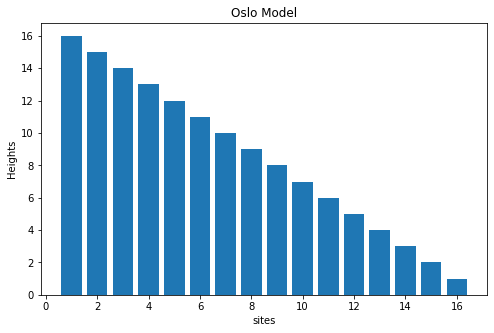

In [17]:
# Test 3, p = 1, z_th = [1], Recurrent state should be L = 16
a,b, mean_height,d = Oslo(16,p = 1/1,plot= True,N_recurrents = 10,title = "Oslo to BTW (d=1)")

print("Expected = {}, Model = {:.2f}".format(16,mean_height))

In [18]:
# Test: N_s, N_r
# Test if p = 1/2, other Ls?
# Test for another p (p = 1/3?)
# average avalanche size / height (pg 279) --> <s> ~ L^2, but seems only apply when grains added randomly (not Oslo)
# <influx> = <outflux>? N grains, or energy, would be applicable to oslo cuz changes!! ~ but again, not Oslo?

### 1.3. Test 4: Recurrent Configurations

For the Oslo model, we expect N_R to be 5 for L = 2

In [16]:
# L = 1
N_S = 3**L

def N_R(L):
    phi = (1+np.sqrt(5))/2
    N_R = 1/np.sqrt(5)* (phi *(1+phi)**L + 1/(phi * (1+phi)**L))
    return N_R

N_R(2)
a,b,c,configurations = Oslo(2,p = 1/2,plot= True,N_recurrents = 10)

abc = [list(x) for x in set(tuple(x) for x in configurations)]

# [plot_bar(abc[x]) for x in range(len(abc))]

NameError: name 'L' is not defined

# Questions 
1. What exactly is a recurrent configuration?
    * Only after it reaches a steady state right?
    * Notes say not all stable states are recurrent, are everything after steady state recurrent?
        * Recurrent states before steady state?
2. How can you even optimise further?
3. A method to calculate i=1 for different values of p?


#### Efficiency Test

In [8]:
import timeit

mysetup = """
import numpy as np
import random
L =100
prob = [0.5,0.5]
z_ths = [1,2]
"""

mycode = "np.random.choice(z_ths,p=prob)"
print(timeit.timeit(setup = mysetup,stmt = mycode,number = 1000))

mycode = "random.choice(z_ths)"
print(timeit.timeit(setup = mysetup,stmt = mycode,number = 1000))

0.03443957000000353
0.0008322820000046249


In [9]:
import pandas as pd

df = pd.DataFrame({"A":[1,2,3],"B":[2,3,4]})
df["C"] = df.B-df.A
df.
print(df)

SyntaxError: invalid syntax (<ipython-input-9-31273c2312e4>, line 5)

In [14]:
import timeit

mysetup = """
import numpy as np
import random
z = np.linspace(0,100,100)
z_th = np.linspace(0,100,100)
z_diff = z-z_th
"""

mycode = "if any(x > y for x,y in zip(z,z_th)) == True:print('hi')"
print(timeit.timeit(setup = mysetup,stmt = mycode,number = 1000))

mycode = "[x for x in z_diff if x > 0]"
print(timeit.timeit(setup = mysetup,stmt = mycode,number = 1000))

0.02852803399999715
0.055419402999994816


In [15]:
z = np.array([2,3,4])
z[1] = 2
print(z)

[2 2 4]


In [12]:
relaxed = False
z = np.array([1,8,1])
z_th = np.array([5,5,6])

while relaxed == False:

    if any(x > y for x,y in zip(z,z_th)) == True:
        relaxed = False
        print(False)
        print(z)
        z-=1
    else:
        relaxed = True
print(z)

False
[1 8 1]
False
[0 7 0]
False
[-1  6 -1]
[-2  5 -2]


In [13]:
z = [2,0,0]
z_th = [1,1,1]
if z[0] > z_th[0] and sum(z[1:]) == 0:
    print(123)

123


In [108]:
def Oslo(L, plot=False, p=1 / 2, N_recurrents=10, title=None):
    """
    Parameters
    L: Number of sites 
    plot: Plots heights if true
    p: probability
    N_recurrents: Number of recurrent runs after reaching steady state
    """
    # Allows for change in probabilities
    n = int(1 / p)  # Number of thresholds, from probability
#     prob = [p] * n
    z_ths = np.arange(1, n + 1, 1)  # Generates possible thresholds [1,2,...]
    #     print(z_ths)

    # Initialisation
    z = [0] * L
    z_th = [random.choice(z_ths) for x in range(L)]

    # Variables for testing
    avalanches = []
    end_value = 0
    z_avg_steady = []
    steady = False  # To
    N_full_avalanche = 0  # Tracks full avalanches
    configurations = []  # Find number of unique configurations
    outflux = 0
    count = 0

    while end_value < N_recurrents:

        # Drive
        z[0] += 1
        s= 0


        slopes_to_relax = [0]

        # Relaxation - Checks all slopes z relaxed, before driving again
        
        print("---before ",z,z_th)
        
        while len(slopes_to_relax) != 0:
            count +=1
            print("-- count -- ",count)
            check_slopes = slopes_to_relax
            next_slopes = []
            for i in slopes_to_relax:
                if z[i] > z_th[i]:
                    s += 1
                    if i == 0:
                        z[i] = z[i] - 2
                        z[i+1] = z[i+1] + 1
                        
                        if z[i+1] == z_th[i+1] + 1:
                            next_slopes.append(i+1)

                    elif i == len(z) - 1:  # index 0,...,L-1 ; len to L
                        z[len(z) - 1] = z[len(z) - 1] - 1
                        z[len(z) - 2] = z[len(z) - 2] + 1
                        
                        steady = True

#                         if steady == True: outflux += 1
                            
                        if z[len(z) - 2] == z_th[len(z) - 2] + 1:
                            next_slopes.append(len(z) - 2)
                    else:
                        if z[i+1] == z_th[i+1] + 1:
                            next_slopes.append(i+1)
#                         if z[i] ==0:
#                             print ("OHNOOO")
                    
                        z[i] = z[i] - 2
                        z[i + 1] = z[i + 1] + 1
                        z[i - 1] = z[i - 1] + 1
                        
                        if z[i+1] == z_th[i+1] + 1:
                            next_slopes.append(i+1)
                        if z[i-1] == z_th[i-1] + 1:
                            next_slopes.append(i-1)

                    print("inbetween--{}".format(i),z,z_th,next_slopes)    
    
                    # Only resets if topples
                    z_th[i] = random.choice(z_ths)
            
#                     if z[len(z) - 1] == z_th[len(z) - 1] + 1:
#                         next_slopes.append(len(z) - 1)
                else:
                    pass
            
            if len(next_slopes) > 0:
                slopes_to_relax = next_slopes
            else:
                slopes_to_relax = []
                
#                 print("slopes are zero",s,L)

            # If avalance size is whole length of sites
#             if s == L:
#                 print(s,z)
#                 steady = True
#                 N_full_avalanche += 1

            if steady == True:
                end_value += 1
#                 print("-----",end_value)
                z_avg_steady.append(np.cumsum(z[::-1])[::-1][0])
            avalanches.append(s)
        print("---after ",z,z_th)

        configurations.append(z[:])
        # Check 
        if any(x > max(z_ths) for x in z) == True:
            print(z,z_th)
            print(check_slopes)

            raise ValueError("Not all sites relaxed")

    # Obtains cumulative sum of slopes, to represent heights
    heights = np.cumsum(z[::-1])[::-1]  # indexing to reverse list

    if plot == True:
        plot_bar(z)

    #     print(outflux)
    return heights, z, np.mean(z_avg_steady), configurations



Oslo(10,plot = True,N_recurrents = 100000)

---before  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0] [2, 2, 1, 1, 2, 1, 1, 2, 1, 2]
-- count --  1
---after  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0] [2, 2, 1, 1, 2, 1, 1, 2, 1, 2]
---before  [2, 0, 0, 0, 0, 0, 0, 0, 0, 0] [2, 2, 1, 1, 2, 1, 1, 2, 1, 2]
-- count --  2
---after  [2, 0, 0, 0, 0, 0, 0, 0, 0, 0] [2, 2, 1, 1, 2, 1, 1, 2, 1, 2]
---before  [3, 0, 0, 0, 0, 0, 0, 0, 0, 0] [2, 2, 1, 1, 2, 1, 1, 2, 1, 2]
-- count --  3
inbetween--0 [1, 1, 0, 0, 0, 0, 0, 0, 0, 0] [2, 2, 1, 1, 2, 1, 1, 2, 1, 2] []
---after  [1, 1, 0, 0, 0, 0, 0, 0, 0, 0] [2, 2, 1, 1, 2, 1, 1, 2, 1, 2]
---before  [2, 1, 0, 0, 0, 0, 0, 0, 0, 0] [2, 2, 1, 1, 2, 1, 1, 2, 1, 2]
-- count --  4
---after  [2, 1, 0, 0, 0, 0, 0, 0, 0, 0] [2, 2, 1, 1, 2, 1, 1, 2, 1, 2]
---before  [3, 1, 0, 0, 0, 0, 0, 0, 0, 0] [2, 2, 1, 1, 2, 1, 1, 2, 1, 2]
-- count --  5
inbetween--0 [1, 2, 0, 0, 0, 0, 0, 0, 0, 0] [2, 2, 1, 1, 2, 1, 1, 2, 1, 2] []
---after  [1, 2, 0, 0, 0, 0, 0, 0, 0, 0] [2, 2, 1, 1, 2, 1, 1, 2, 1, 2]
---before  [2, 2, 0, 0, 0, 0, 0, 0, 0, 0] [2

inbetween--0 [1, 1, 2, 2, 2, 1, 1, 2, 1, 0] [2, 2, 2, 2, 2, 1, 2, 2, 1, 2] []
---after  [1, 1, 2, 2, 2, 1, 1, 2, 1, 0] [2, 2, 2, 2, 2, 1, 2, 2, 1, 2]
---before  [2, 1, 2, 2, 2, 1, 1, 2, 1, 0] [2, 2, 2, 2, 2, 1, 2, 2, 1, 2]
-- count --  164
---after  [2, 1, 2, 2, 2, 1, 1, 2, 1, 0] [2, 2, 2, 2, 2, 1, 2, 2, 1, 2]
---before  [3, 1, 2, 2, 2, 1, 1, 2, 1, 0] [2, 2, 2, 2, 2, 1, 2, 2, 1, 2]
-- count --  165
inbetween--0 [1, 2, 2, 2, 2, 1, 1, 2, 1, 0] [2, 2, 2, 2, 2, 1, 2, 2, 1, 2] []
---after  [1, 2, 2, 2, 2, 1, 1, 2, 1, 0] [1, 2, 2, 2, 2, 1, 2, 2, 1, 2]
---before  [2, 2, 2, 2, 2, 1, 1, 2, 1, 0] [1, 2, 2, 2, 2, 1, 2, 2, 1, 2]
-- count --  166
inbetween--0 [0, 3, 2, 2, 2, 1, 1, 2, 1, 0] [1, 2, 2, 2, 2, 1, 2, 2, 1, 2] [1]
-- count --  167
inbetween--1 [1, 1, 3, 2, 2, 1, 1, 2, 1, 0] [2, 2, 2, 2, 2, 1, 2, 2, 1, 2] [2]
-- count --  168
inbetween--2 [1, 2, 1, 3, 2, 1, 1, 2, 1, 0] [2, 2, 2, 2, 2, 1, 2, 2, 1, 2] [3]
-- count --  169
inbetween--3 [1, 2, 2, 1, 3, 1, 1, 2, 1, 0] [2, 2, 1, 2, 2, 1, 2, 2, 1

---after  [1, 1, 2, 1, 2, 2, 1, 2, 2, 2] [1, 2, 2, 2, 2, 2, 1, 2, 2, 2]
---before  [2, 1, 2, 1, 2, 2, 1, 2, 2, 2] [1, 2, 2, 2, 2, 2, 1, 2, 2, 2]
-- count --  329
inbetween--0 [0, 2, 2, 1, 2, 2, 1, 2, 2, 2] [1, 2, 2, 2, 2, 2, 1, 2, 2, 2] []
---after  [0, 2, 2, 1, 2, 2, 1, 2, 2, 2] [1, 2, 2, 2, 2, 2, 1, 2, 2, 2]
---before  [1, 2, 2, 1, 2, 2, 1, 2, 2, 2] [1, 2, 2, 2, 2, 2, 1, 2, 2, 2]
-- count --  330
---after  [1, 2, 2, 1, 2, 2, 1, 2, 2, 2] [1, 2, 2, 2, 2, 2, 1, 2, 2, 2]
---before  [2, 2, 2, 1, 2, 2, 1, 2, 2, 2] [1, 2, 2, 2, 2, 2, 1, 2, 2, 2]
-- count --  331
inbetween--0 [0, 3, 2, 1, 2, 2, 1, 2, 2, 2] [1, 2, 2, 2, 2, 2, 1, 2, 2, 2] [1]
-- count --  332
inbetween--1 [1, 1, 3, 1, 2, 2, 1, 2, 2, 2] [1, 2, 2, 2, 2, 2, 1, 2, 2, 2] [2]
-- count --  333
inbetween--2 [1, 2, 1, 2, 2, 2, 1, 2, 2, 2] [1, 2, 2, 2, 2, 2, 1, 2, 2, 2] []
---after  [1, 2, 1, 2, 2, 2, 1, 2, 2, 2] [1, 2, 2, 2, 2, 2, 1, 2, 2, 2]
---before  [2, 2, 1, 2, 2, 2, 1, 2, 2, 2] [1, 2, 2, 2, 2, 2, 1, 2, 2, 2]
-- count --  334
inbe

-- count --  426
inbetween--1 [1, 1, 2, 1, 2, 1, 2, 1, 2, 2] [1, 2, 1, 1, 2, 2, 2, 2, 2, 1] [2]
-- count --  427
inbetween--2 [1, 2, 0, 2, 2, 1, 2, 1, 2, 2] [1, 1, 1, 1, 2, 2, 2, 2, 2, 1] [3, 1]
-- count --  428
inbetween--3 [1, 2, 1, 0, 3, 1, 2, 1, 2, 2] [1, 1, 1, 1, 2, 2, 2, 2, 2, 1] [4]
inbetween--1 [2, 0, 2, 0, 3, 1, 2, 1, 2, 2] [1, 1, 1, 2, 2, 2, 2, 2, 2, 1] [4, 2, 0]
-- count --  429
inbetween--4 [2, 0, 2, 1, 1, 2, 2, 1, 2, 2] [1, 2, 1, 2, 2, 2, 2, 2, 2, 1] []
inbetween--2 [2, 1, 0, 2, 1, 2, 2, 1, 2, 2] [1, 2, 1, 2, 2, 2, 2, 2, 2, 1] []
inbetween--0 [0, 2, 0, 2, 1, 2, 2, 1, 2, 2] [1, 2, 1, 2, 2, 2, 2, 2, 2, 1] []
---after  [0, 2, 0, 2, 1, 2, 2, 1, 2, 2] [2, 2, 1, 2, 2, 2, 2, 2, 2, 1]
---before  [1, 2, 0, 2, 1, 2, 2, 1, 2, 2] [2, 2, 1, 2, 2, 2, 2, 2, 2, 1]
-- count --  430
---after  [1, 2, 0, 2, 1, 2, 2, 1, 2, 2] [2, 2, 1, 2, 2, 2, 2, 2, 2, 1]
---before  [2, 2, 0, 2, 1, 2, 2, 1, 2, 2] [2, 2, 1, 2, 2, 2, 2, 2, 2, 1]
-- count --  431
---after  [2, 2, 0, 2, 1, 2, 2, 1, 2, 2] [2, 2, 1

inbetween--8 [1, 1, 2, 2, 3, 0, 2, 2, 0, 3] [1, 2, 2, 2, 2, 2, 2, 1, 1, 1] [9, 7]
inbetween--4 [1, 1, 2, 3, 1, 1, 2, 2, 0, 3] [1, 2, 2, 2, 2, 2, 2, 1, 1, 1] [9, 7, 3]
-- count --  587
inbetween--9 [1, 1, 2, 3, 1, 1, 2, 2, 1, 2] [1, 2, 2, 2, 2, 2, 2, 1, 1, 1] []
inbetween--7 [1, 1, 2, 3, 1, 1, 3, 0, 2, 2] [1, 2, 2, 2, 2, 2, 2, 1, 1, 2] [8, 6]
inbetween--3 [1, 1, 3, 1, 2, 1, 3, 0, 2, 2] [1, 2, 2, 2, 2, 2, 2, 2, 1, 2] [8, 6, 2]
-- count --  588
inbetween--8 [1, 1, 3, 1, 2, 1, 3, 1, 0, 3] [1, 2, 2, 1, 2, 2, 2, 2, 1, 2] [9]
inbetween--6 [1, 1, 3, 1, 2, 2, 1, 2, 0, 3] [1, 2, 2, 1, 2, 2, 2, 2, 1, 2] [9]
inbetween--2 [1, 2, 1, 2, 2, 2, 1, 2, 0, 3] [1, 2, 2, 1, 2, 2, 2, 2, 1, 2] [9, 3]
-- count --  589
inbetween--9 [1, 2, 1, 2, 2, 2, 1, 2, 1, 2] [1, 2, 1, 1, 2, 2, 2, 2, 1, 2] []
inbetween--3 [1, 2, 2, 0, 3, 2, 1, 2, 1, 2] [1, 2, 1, 1, 2, 2, 2, 2, 1, 2] [4, 2]
-- count --  590
inbetween--4 [1, 2, 2, 1, 1, 3, 1, 2, 1, 2] [1, 2, 1, 1, 2, 2, 2, 2, 1, 2] [5]
inbetween--2 [1, 3, 0, 2, 1, 3, 1, 2, 1, 

inbetween--7 [2, 1, 1, 2, 2, 2, 1, 1, 3, 2] [2, 2, 1, 2, 2, 1, 1, 2, 2, 2] [8]
inbetween--5 [2, 1, 1, 2, 3, 0, 2, 1, 3, 2] [2, 2, 1, 2, 2, 1, 1, 2, 2, 2] [8, 6, 4]
-- count --  748
inbetween--8 [2, 1, 1, 2, 3, 0, 2, 2, 1, 3] [2, 2, 1, 2, 2, 2, 1, 2, 2, 2] [9]
inbetween--6 [2, 1, 1, 2, 3, 1, 0, 3, 1, 3] [2, 2, 1, 2, 2, 2, 1, 2, 2, 2] [9, 7]
inbetween--4 [2, 1, 1, 3, 1, 2, 0, 3, 1, 3] [2, 2, 1, 2, 2, 2, 2, 2, 2, 2] [9, 7, 3]
-- count --  749
inbetween--9 [2, 1, 1, 3, 1, 2, 0, 3, 2, 2] [2, 2, 1, 2, 2, 2, 2, 2, 2, 2] []
inbetween--7 [2, 1, 1, 3, 1, 2, 1, 1, 3, 2] [2, 2, 1, 2, 2, 2, 2, 2, 2, 2] [8]
inbetween--3 [2, 1, 2, 1, 2, 2, 1, 1, 3, 2] [2, 2, 1, 2, 2, 2, 2, 1, 2, 2] [8, 2]
-- count --  750
inbetween--8 [2, 1, 2, 1, 2, 2, 1, 2, 1, 3] [2, 2, 1, 1, 2, 2, 2, 1, 2, 2] [9, 7]
inbetween--2 [2, 2, 0, 2, 2, 2, 1, 2, 1, 3] [2, 2, 1, 1, 2, 2, 2, 1, 1, 2] [9, 7, 3]
-- count --  751
inbetween--9 [2, 2, 0, 2, 2, 2, 1, 2, 2, 2] [2, 2, 1, 1, 2, 2, 2, 1, 1, 2] [8]
inbetween--7 [2, 2, 0, 2, 2, 2, 2, 0,

inbetween--5 [1, 1, 2, 2, 2, 1, 3, 2, 1, 2] [2, 1, 2, 1, 2, 2, 2, 2, 2, 1] [6]
inbetween--3 [1, 1, 3, 0, 3, 1, 3, 2, 1, 2] [2, 1, 2, 1, 2, 1, 2, 2, 2, 1] [6, 4, 2]
-- count --  905
inbetween--6 [1, 1, 3, 0, 3, 2, 1, 3, 1, 2] [2, 1, 2, 1, 2, 1, 2, 2, 2, 1] [7, 5]
inbetween--4 [1, 1, 3, 1, 1, 3, 1, 3, 1, 2] [2, 1, 2, 1, 2, 1, 2, 2, 2, 1] [7, 5, 5]
inbetween--2 [1, 2, 1, 2, 1, 3, 1, 3, 1, 2] [2, 1, 2, 1, 2, 1, 2, 2, 2, 1] [7, 5, 5, 3, 1]
-- count --  906
inbetween--7 [1, 2, 1, 2, 1, 3, 2, 1, 2, 2] [2, 1, 2, 1, 2, 1, 2, 2, 2, 1] []
inbetween--5 [1, 2, 1, 2, 2, 1, 3, 1, 2, 2] [2, 1, 2, 1, 2, 1, 2, 1, 2, 1] [6]
inbetween--3 [1, 2, 2, 0, 3, 1, 3, 1, 2, 2] [2, 1, 2, 1, 2, 2, 2, 1, 2, 1] [6, 4]
inbetween--1 [2, 0, 3, 0, 3, 1, 3, 1, 2, 2] [2, 1, 2, 1, 2, 2, 2, 1, 2, 1] [6, 4, 2]
-- count --  907
inbetween--6 [2, 0, 3, 0, 3, 2, 1, 2, 2, 2] [2, 2, 2, 1, 2, 2, 2, 1, 2, 1] [7]
inbetween--4 [2, 0, 3, 1, 1, 3, 1, 2, 2, 2] [2, 2, 2, 1, 2, 2, 2, 1, 2, 1] [7, 5]
inbetween--2 [2, 1, 1, 2, 1, 3, 1, 2, 2, 2

inbetween--0 [1, 3, 2, 2, 2, 2, 1, 2, 2, 2] [2, 2, 2, 2, 2, 2, 2, 2, 2, 1] [1]
-- count --  1036
inbetween--1 [2, 1, 3, 2, 2, 2, 1, 2, 2, 2] [2, 2, 2, 2, 2, 2, 2, 2, 2, 1] [2]
-- count --  1037
inbetween--2 [2, 2, 1, 3, 2, 2, 1, 2, 2, 2] [2, 2, 2, 2, 2, 2, 2, 2, 2, 1] [3]
-- count --  1038
inbetween--3 [2, 2, 2, 1, 3, 2, 1, 2, 2, 2] [2, 2, 2, 2, 2, 2, 2, 2, 2, 1] [4]
-- count --  1039
inbetween--4 [2, 2, 2, 2, 1, 3, 1, 2, 2, 2] [2, 2, 2, 2, 2, 2, 2, 2, 2, 1] [5]
-- count --  1040
inbetween--5 [2, 2, 2, 2, 2, 1, 2, 2, 2, 2] [2, 2, 2, 2, 1, 2, 2, 2, 2, 1] [4]
-- count --  1041
inbetween--4 [2, 2, 2, 3, 0, 2, 2, 2, 2, 2] [2, 2, 2, 2, 1, 1, 2, 2, 2, 1] [5, 3]
-- count --  1042
inbetween--5 [2, 2, 2, 3, 1, 0, 3, 2, 2, 2] [2, 2, 2, 2, 2, 1, 2, 2, 2, 1] [6]
inbetween--3 [2, 2, 3, 1, 2, 0, 3, 2, 2, 2] [2, 2, 2, 2, 2, 2, 2, 2, 2, 1] [6, 2]
-- count --  1043
inbetween--6 [2, 2, 3, 1, 2, 1, 1, 3, 2, 2] [2, 2, 2, 1, 2, 2, 2, 2, 2, 1] [7]
inbetween--2 [2, 3, 1, 2, 2, 1, 1, 3, 2, 2] [2, 2, 2, 1, 2, 

inbetween--3 [1, 3, 1, 1, 3, 1, 3, 1, 3, 2] [2, 2, 2, 2, 2, 2, 1, 2, 2, 2] [8, 6, 6, 4]
inbetween--1 [2, 1, 2, 1, 3, 1, 3, 1, 3, 2] [2, 2, 2, 2, 2, 2, 1, 2, 2, 2] [8, 6, 6, 4]
-- count --  1122
inbetween--8 [2, 1, 2, 1, 3, 1, 3, 2, 1, 3] [2, 1, 2, 2, 2, 2, 1, 2, 2, 2] [9]
inbetween--6 [2, 1, 2, 1, 3, 2, 1, 3, 1, 3] [2, 1, 2, 2, 2, 2, 1, 2, 2, 2] [9, 7]
inbetween--4 [2, 1, 2, 2, 1, 3, 1, 3, 1, 3] [2, 1, 2, 2, 2, 2, 2, 2, 2, 2] [9, 7, 5]
-- count --  1123
inbetween--9 [2, 1, 2, 2, 1, 3, 1, 3, 2, 2] [2, 1, 2, 2, 2, 2, 2, 2, 2, 2] []
inbetween--7 [2, 1, 2, 2, 1, 3, 2, 1, 3, 2] [2, 1, 2, 2, 2, 2, 2, 2, 2, 1] [8]
inbetween--5 [2, 1, 2, 2, 2, 1, 3, 1, 3, 2] [2, 1, 2, 2, 2, 2, 2, 2, 2, 1] [8, 6]
-- count --  1124
inbetween--8 [2, 1, 2, 2, 2, 1, 3, 2, 1, 3] [2, 1, 2, 2, 2, 2, 2, 2, 2, 1] [9]
inbetween--6 [2, 1, 2, 2, 2, 2, 1, 3, 1, 3] [2, 1, 2, 2, 2, 2, 2, 2, 2, 1] [9, 7]
-- count --  1125
inbetween--9 [2, 1, 2, 2, 2, 2, 1, 3, 2, 2] [2, 1, 2, 2, 2, 2, 1, 2, 2, 1] []
inbetween--7 [2, 1, 2, 2, 2,

-- count --  1214
inbetween--6 [1, 2, 1, 2, 1, 3, 1, 2, 2, 2] [1, 2, 2, 2, 2, 2, 2, 2, 2, 1] [5]
-- count --  1215
inbetween--5 [1, 2, 1, 2, 2, 1, 2, 2, 2, 2] [1, 2, 2, 2, 2, 2, 1, 2, 2, 1] [6]
-- count --  1216
inbetween--6 [1, 2, 1, 2, 2, 2, 0, 3, 2, 2] [1, 2, 2, 2, 2, 2, 1, 2, 2, 1] [7]
-- count --  1217
inbetween--7 [1, 2, 1, 2, 2, 2, 1, 1, 3, 2] [1, 2, 2, 2, 2, 2, 1, 2, 2, 1] [8]
-- count --  1218
inbetween--8 [1, 2, 1, 2, 2, 2, 1, 2, 1, 3] [1, 2, 2, 2, 2, 2, 1, 2, 2, 1] [9]
-- count --  1219
inbetween--9 [1, 2, 1, 2, 2, 2, 1, 2, 2, 2] [1, 2, 2, 2, 2, 2, 1, 2, 1, 1] [8]
-- count --  1220
inbetween--8 [1, 2, 1, 2, 2, 2, 1, 3, 0, 3] [1, 2, 2, 2, 2, 2, 1, 2, 1, 1] [9, 7]
-- count --  1221
inbetween--9 [1, 2, 1, 2, 2, 2, 1, 3, 1, 2] [1, 2, 2, 2, 2, 2, 1, 2, 1, 1] []
inbetween--7 [1, 2, 1, 2, 2, 2, 2, 1, 2, 2] [1, 2, 2, 2, 2, 2, 1, 2, 1, 1] [8, 6]
-- count --  1222
inbetween--8 [1, 2, 1, 2, 2, 2, 2, 2, 0, 3] [1, 2, 2, 2, 2, 2, 1, 2, 1, 1] [9]
inbetween--6 [1, 2, 1, 2, 2, 3, 0, 3, 0, 3]

inbetween--7 [0, 3, 1, 1, 2, 2, 2, 1, 3, 2] [2, 1, 1, 1, 2, 2, 1, 1, 1, 1] [8, 8, 6]
inbetween--1 [1, 1, 2, 1, 2, 2, 2, 1, 3, 2] [2, 1, 1, 1, 2, 2, 1, 1, 1, 1] [8, 8, 6, 2]
-- count --  1316
inbetween--8 [1, 1, 2, 1, 2, 2, 2, 2, 1, 3] [2, 2, 1, 1, 2, 2, 1, 1, 1, 1] [9, 7]
inbetween--6 [1, 1, 2, 1, 2, 3, 0, 3, 1, 3] [2, 2, 1, 1, 2, 2, 1, 1, 1, 1] [9, 7, 7, 5]
inbetween--2 [1, 2, 0, 2, 2, 3, 0, 3, 1, 3] [2, 2, 1, 1, 2, 2, 2, 1, 1, 1] [9, 7, 7, 5, 3]
-- count --  1317
inbetween--9 [1, 2, 0, 2, 2, 3, 0, 3, 2, 2] [2, 2, 2, 1, 2, 2, 2, 1, 1, 1] [8]
inbetween--7 [1, 2, 0, 2, 2, 3, 1, 1, 3, 2] [2, 2, 2, 1, 2, 2, 2, 1, 1, 2] [8, 8]
inbetween--5 [1, 2, 0, 2, 3, 1, 2, 1, 3, 2] [2, 2, 2, 1, 2, 2, 2, 2, 1, 2] [8, 8, 4]
inbetween--3 [1, 2, 1, 0, 4, 1, 2, 1, 3, 2] [2, 2, 2, 1, 2, 1, 2, 2, 1, 2] [8, 8, 4, 4]
-- count --  1318
inbetween--8 [1, 2, 1, 0, 4, 1, 2, 2, 1, 3] [2, 2, 2, 1, 2, 1, 2, 2, 1, 2] [9]
inbetween--4 [1, 2, 1, 1, 2, 2, 2, 2, 1, 3] [2, 2, 2, 1, 2, 1, 2, 2, 2, 2] [9, 5]
-- count --  1319

-- count --  1421
inbetween--9 [1, 0, 2, 2, 0, 3, 1, 2, 2, 2] [2, 2, 2, 1, 1, 2, 1, 1, 2, 2] []
inbetween--7 [1, 0, 2, 2, 0, 3, 2, 0, 3, 2] [2, 2, 2, 1, 1, 2, 1, 1, 2, 2] [8, 6]
inbetween--5 [1, 0, 2, 2, 1, 1, 3, 0, 3, 2] [2, 2, 2, 1, 1, 2, 1, 1, 2, 2] [8, 6, 6]
inbetween--3 [1, 0, 3, 0, 2, 1, 3, 0, 3, 2] [2, 2, 2, 1, 1, 1, 1, 1, 2, 2] [8, 6, 6, 4, 2]
-- count --  1422
inbetween--8 [1, 0, 3, 0, 2, 1, 3, 1, 1, 3] [2, 2, 2, 2, 1, 1, 1, 1, 2, 2] [9]
inbetween--6 [1, 0, 3, 0, 2, 2, 1, 2, 1, 3] [2, 2, 2, 2, 1, 1, 1, 1, 1, 2] [9, 7, 5]
inbetween--4 [1, 0, 3, 1, 0, 3, 1, 2, 1, 3] [2, 2, 2, 2, 1, 1, 2, 1, 1, 2] [9, 7, 5, 5]
inbetween--2 [1, 1, 1, 2, 0, 3, 1, 2, 1, 3] [2, 2, 2, 2, 2, 1, 2, 1, 1, 2] [9, 7, 5, 5]
-- count --  1423
inbetween--9 [1, 1, 1, 2, 0, 3, 1, 2, 2, 2] [2, 2, 2, 2, 2, 1, 2, 1, 1, 2] [8]
inbetween--7 [1, 1, 1, 2, 0, 3, 2, 0, 3, 2] [2, 2, 2, 2, 2, 1, 2, 1, 1, 1] [8, 8]
inbetween--5 [1, 1, 1, 2, 1, 1, 3, 0, 3, 2] [2, 2, 2, 2, 2, 1, 2, 2, 1, 1] [8, 8, 6]
-- count --  1424
inbetw

inbetween--8 [2, 1, 2, 1, 2, 1, 2, 2, 1, 3] [2, 1, 2, 1, 2, 2, 1, 2, 1, 2] [9]
inbetween--6 [2, 1, 2, 1, 2, 2, 0, 3, 1, 3] [2, 1, 2, 1, 2, 2, 1, 2, 1, 2] [9, 7]
-- count --  1564
inbetween--9 [2, 1, 2, 1, 2, 2, 0, 3, 2, 2] [2, 1, 2, 1, 2, 2, 2, 2, 1, 2] [8]
inbetween--7 [2, 1, 2, 1, 2, 2, 1, 1, 3, 2] [2, 1, 2, 1, 2, 2, 2, 2, 1, 2] [8, 8]
-- count --  1565
inbetween--8 [2, 1, 2, 1, 2, 2, 1, 2, 1, 3] [2, 1, 2, 1, 2, 2, 2, 1, 1, 2] [9, 7]
-- count --  1566
inbetween--9 [2, 1, 2, 1, 2, 2, 1, 2, 2, 2] [2, 1, 2, 1, 2, 2, 2, 1, 2, 2] []
inbetween--7 [2, 1, 2, 1, 2, 2, 2, 0, 3, 2] [2, 1, 2, 1, 2, 2, 2, 1, 2, 2] [8]
-- count --  1567
inbetween--8 [2, 1, 2, 1, 2, 2, 2, 1, 1, 3] [2, 1, 2, 1, 2, 2, 2, 2, 2, 2] [9]
-- count --  1568
inbetween--9 [2, 1, 2, 1, 2, 2, 2, 1, 2, 2] [2, 1, 2, 1, 2, 2, 2, 2, 1, 2] [8]
-- count --  1569
inbetween--8 [2, 1, 2, 1, 2, 2, 2, 2, 0, 3] [2, 1, 2, 1, 2, 2, 2, 2, 1, 1] [9]
-- count --  1570
inbetween--9 [2, 1, 2, 1, 2, 2, 2, 2, 1, 2] [2, 1, 2, 1, 2, 2, 2, 2, 2, 1] [

-- count --  1701
inbetween--1 [2, 1, 2, 2, 1, 1, 2, 2, 2, 2] [1, 2, 2, 2, 1, 2, 2, 2, 2, 1] [0]
-- count --  1702
inbetween--0 [0, 2, 2, 2, 1, 1, 2, 2, 2, 2] [1, 1, 2, 2, 1, 2, 2, 2, 2, 1] [1]
-- count --  1703
inbetween--1 [1, 0, 3, 2, 1, 1, 2, 2, 2, 2] [1, 1, 2, 2, 1, 2, 2, 2, 2, 1] [2]
-- count --  1704
inbetween--2 [1, 1, 1, 3, 1, 1, 2, 2, 2, 2] [1, 2, 2, 2, 1, 2, 2, 2, 2, 1] [3]
-- count --  1705
inbetween--3 [1, 1, 2, 1, 2, 1, 2, 2, 2, 2] [1, 2, 2, 2, 1, 2, 2, 2, 2, 1] [4]
-- count --  1706
inbetween--4 [1, 1, 2, 2, 0, 2, 2, 2, 2, 2] [1, 2, 2, 2, 1, 2, 2, 2, 2, 1] []
---after  [1, 1, 2, 2, 0, 2, 2, 2, 2, 2] [1, 2, 2, 2, 2, 2, 2, 2, 2, 1]
---before  [2, 1, 2, 2, 0, 2, 2, 2, 2, 2] [1, 2, 2, 2, 2, 2, 2, 2, 2, 1]
-- count --  1707
inbetween--0 [0, 2, 2, 2, 0, 2, 2, 2, 2, 2] [1, 2, 2, 2, 2, 2, 2, 2, 2, 1] []
---after  [0, 2, 2, 2, 0, 2, 2, 2, 2, 2] [1, 2, 2, 2, 2, 2, 2, 2, 2, 1]
---before  [1, 2, 2, 2, 0, 2, 2, 2, 2, 2] [1, 2, 2, 2, 2, 2, 2, 2, 2, 1]
-- count --  1708
---after  [1, 2

inbetween--2 [2, 1, 1, 2, 2, 2, 2, 1, 2, 2] [2, 2, 2, 1, 2, 2, 2, 1, 2, 1] [3]
-- count --  1812
inbetween--3 [2, 1, 2, 0, 3, 2, 2, 1, 2, 2] [2, 2, 2, 1, 2, 2, 2, 1, 2, 1] [4]
-- count --  1813
inbetween--4 [2, 1, 2, 1, 1, 3, 2, 1, 2, 2] [2, 2, 2, 2, 2, 2, 2, 1, 2, 1] [5]
-- count --  1814
inbetween--5 [2, 1, 2, 1, 2, 1, 3, 1, 2, 2] [2, 2, 2, 2, 2, 2, 2, 1, 2, 1] [6]
-- count --  1815
inbetween--6 [2, 1, 2, 1, 2, 2, 1, 2, 2, 2] [2, 2, 2, 2, 2, 2, 2, 1, 2, 1] [7]
-- count --  1816
inbetween--7 [2, 1, 2, 1, 2, 2, 2, 0, 3, 2] [2, 2, 2, 2, 2, 2, 1, 1, 2, 1] [8, 6]
-- count --  1817
inbetween--8 [2, 1, 2, 1, 2, 2, 2, 1, 1, 3] [2, 2, 2, 2, 2, 2, 1, 2, 2, 1] [9]
inbetween--6 [2, 1, 2, 1, 2, 3, 0, 2, 1, 3] [2, 2, 2, 2, 2, 2, 1, 2, 2, 1] [9, 5]
-- count --  1818
inbetween--9 [2, 1, 2, 1, 2, 3, 0, 2, 2, 2] [2, 2, 2, 2, 2, 2, 1, 2, 2, 1] []
inbetween--5 [2, 1, 2, 1, 3, 1, 1, 2, 2, 2] [2, 2, 2, 2, 2, 2, 1, 2, 2, 1] [4]
-- count --  1819
inbetween--4 [2, 1, 2, 2, 1, 2, 1, 2, 2, 2] [2, 2, 2, 2, 2, 2

---before  [3, 2, 1, 1, 1, 2, 2, 2, 2, 2] [2, 2, 2, 2, 2, 2, 2, 2, 2, 1]
-- count --  1937
inbetween--0 [1, 3, 1, 1, 1, 2, 2, 2, 2, 2] [2, 2, 2, 2, 2, 2, 2, 2, 2, 1] [1]
-- count --  1938
inbetween--1 [2, 1, 2, 1, 1, 2, 2, 2, 2, 2] [2, 2, 2, 2, 2, 2, 2, 2, 2, 1] []
---after  [2, 1, 2, 1, 1, 2, 2, 2, 2, 2] [2, 1, 2, 2, 2, 2, 2, 2, 2, 1]
---before  [3, 1, 2, 1, 1, 2, 2, 2, 2, 2] [2, 1, 2, 2, 2, 2, 2, 2, 2, 1]
-- count --  1939
inbetween--0 [1, 2, 2, 1, 1, 2, 2, 2, 2, 2] [2, 1, 2, 2, 2, 2, 2, 2, 2, 1] [1]
-- count --  1940
inbetween--1 [2, 0, 3, 1, 1, 2, 2, 2, 2, 2] [1, 1, 2, 2, 2, 2, 2, 2, 2, 1] [2, 0]
-- count --  1941
inbetween--2 [2, 1, 1, 2, 1, 2, 2, 2, 2, 2] [1, 2, 2, 2, 2, 2, 2, 2, 2, 1] []
inbetween--0 [0, 2, 1, 2, 1, 2, 2, 2, 2, 2] [1, 2, 2, 2, 2, 2, 2, 2, 2, 1] []
---after  [0, 2, 1, 2, 1, 2, 2, 2, 2, 2] [2, 2, 2, 2, 2, 2, 2, 2, 2, 1]
---before  [1, 2, 1, 2, 1, 2, 2, 2, 2, 2] [2, 2, 2, 2, 2, 2, 2, 2, 2, 1]
-- count --  1942
---after  [1, 2, 1, 2, 1, 2, 2, 2, 2, 2] [2, 2, 2, 2, 2

inbetween--3 [2, 1, 1, 1, 3, 0, 3, 1, 3, 2] [2, 2, 2, 1, 2, 2, 1, 1, 2, 2] [8, 6, 6, 4]
-- count --  2044
inbetween--8 [2, 1, 1, 1, 3, 0, 3, 2, 1, 3] [2, 2, 2, 1, 2, 2, 1, 1, 2, 2] [9, 7]
inbetween--6 [2, 1, 1, 1, 3, 1, 1, 3, 1, 3] [2, 2, 2, 1, 2, 2, 1, 1, 1, 2] [9, 7, 7]
inbetween--4 [2, 1, 1, 2, 1, 2, 1, 3, 1, 3] [2, 2, 2, 1, 2, 2, 1, 1, 1, 2] [9, 7, 7, 3]
-- count --  2045
inbetween--9 [2, 1, 1, 2, 1, 2, 1, 3, 2, 2] [2, 2, 2, 1, 1, 2, 1, 1, 1, 2] [8]
inbetween--7 [2, 1, 1, 2, 1, 2, 2, 1, 3, 2] [2, 2, 2, 1, 1, 2, 1, 1, 1, 1] [8, 8, 6]
inbetween--3 [2, 1, 2, 0, 2, 2, 2, 1, 3, 2] [2, 2, 2, 1, 1, 2, 1, 1, 1, 1] [8, 8, 6, 4]
-- count --  2046
inbetween--8 [2, 1, 2, 0, 2, 2, 2, 2, 1, 3] [2, 2, 2, 1, 1, 2, 1, 1, 1, 1] [9, 7]
inbetween--6 [2, 1, 2, 0, 2, 3, 0, 3, 1, 3] [2, 2, 2, 1, 1, 2, 1, 1, 2, 1] [9, 7, 7, 5]
inbetween--4 [2, 1, 2, 1, 0, 4, 0, 3, 1, 3] [2, 2, 2, 1, 1, 2, 1, 1, 2, 1] [9, 7, 7, 5, 5]
-- count --  2047
inbetween--9 [2, 1, 2, 1, 0, 4, 0, 3, 2, 2] [2, 2, 2, 1, 1, 2, 1, 1, 2, 

inbetween--5 [2, 2, 0, 3, 3, 0, 2, 1, 3, 2] [2, 2, 1, 2, 2, 1, 1, 1, 2, 2] [8, 6, 4]
inbetween--3 [2, 2, 1, 1, 4, 0, 2, 1, 3, 2] [2, 2, 1, 2, 2, 2, 1, 1, 2, 2] [8, 6, 4, 4]
-- count --  2139
inbetween--8 [2, 2, 1, 1, 4, 0, 2, 2, 1, 3] [2, 2, 1, 2, 2, 2, 1, 1, 2, 2] [9, 7]
inbetween--6 [2, 2, 1, 1, 4, 1, 0, 3, 1, 3] [2, 2, 1, 2, 2, 2, 1, 1, 2, 2] [9, 7, 7]
inbetween--4 [2, 2, 1, 2, 2, 2, 0, 3, 1, 3] [2, 2, 1, 2, 2, 2, 2, 1, 2, 2] [9, 7, 7]
inbetween--4 [2, 2, 1, 3, 0, 3, 0, 3, 1, 3] [2, 2, 1, 2, 1, 2, 2, 1, 2, 2] [9, 7, 7, 5, 3]
-- count --  2140
inbetween--9 [2, 2, 1, 3, 0, 3, 0, 3, 2, 2] [2, 2, 1, 2, 2, 2, 2, 1, 2, 2] []
inbetween--7 [2, 2, 1, 3, 0, 3, 1, 1, 3, 2] [2, 2, 1, 2, 2, 2, 2, 1, 2, 2] [8]
inbetween--5 [2, 2, 1, 3, 1, 1, 2, 1, 3, 2] [2, 2, 1, 2, 2, 2, 2, 1, 2, 2] [8]
inbetween--3 [2, 2, 2, 1, 2, 1, 2, 1, 3, 2] [2, 2, 1, 2, 2, 1, 2, 1, 2, 2] [8, 2]
-- count --  2141
inbetween--8 [2, 2, 2, 1, 2, 1, 2, 2, 1, 3] [2, 2, 1, 1, 2, 1, 2, 1, 2, 2] [9, 7]
inbetween--2 [2, 3, 0, 2, 2, 1

inbetween--1 [2, 1, 2, 2, 1, 2, 2, 2, 2, 2] [1, 2, 2, 2, 1, 2, 2, 2, 2, 2] [0]
-- count --  2243
inbetween--0 [0, 2, 2, 2, 1, 2, 2, 2, 2, 2] [1, 1, 2, 2, 1, 2, 2, 2, 2, 2] [1]
-- count --  2244
inbetween--1 [1, 0, 3, 2, 1, 2, 2, 2, 2, 2] [1, 1, 2, 2, 1, 2, 2, 2, 2, 2] [2]
-- count --  2245
inbetween--2 [1, 1, 1, 3, 1, 2, 2, 2, 2, 2] [1, 2, 2, 2, 1, 2, 2, 2, 2, 2] [3]
-- count --  2246
inbetween--3 [1, 1, 2, 1, 2, 2, 2, 2, 2, 2] [1, 2, 2, 2, 1, 2, 2, 2, 2, 2] [4]
-- count --  2247
inbetween--4 [1, 1, 2, 2, 0, 3, 2, 2, 2, 2] [1, 2, 2, 1, 1, 2, 2, 2, 2, 2] [5, 3]
-- count --  2248
inbetween--5 [1, 1, 2, 2, 1, 1, 3, 2, 2, 2] [1, 2, 2, 1, 2, 2, 2, 2, 2, 2] [6]
inbetween--3 [1, 1, 3, 0, 2, 1, 3, 2, 2, 2] [1, 2, 2, 1, 2, 2, 2, 2, 2, 2] [6, 2]
-- count --  2249
inbetween--6 [1, 1, 3, 0, 2, 2, 1, 3, 2, 2] [1, 2, 2, 2, 2, 2, 2, 2, 2, 2] [7]
inbetween--2 [1, 2, 1, 1, 2, 2, 1, 3, 2, 2] [1, 2, 2, 2, 2, 2, 2, 2, 2, 2] [7]
-- count --  2250
inbetween--7 [1, 2, 1, 1, 2, 2, 2, 1, 3, 2] [1, 2, 2, 2, 2, 

inbetween--2 [3, 1, 1, 2, 0, 3, 1, 3, 0, 3] [2, 2, 2, 2, 2, 2, 2, 2, 1, 1] [9, 7, 5]
inbetween--0 [1, 2, 1, 2, 0, 3, 1, 3, 0, 3] [2, 2, 1, 2, 2, 2, 2, 2, 1, 1] [9, 7, 5]
-- count --  2409
inbetween--9 [1, 2, 1, 2, 0, 3, 1, 3, 1, 2] [1, 2, 1, 2, 2, 2, 2, 2, 1, 1] []
inbetween--7 [1, 2, 1, 2, 0, 3, 2, 1, 2, 2] [1, 2, 1, 2, 2, 2, 2, 2, 1, 2] [8]
inbetween--5 [1, 2, 1, 2, 1, 1, 3, 1, 2, 2] [1, 2, 1, 2, 2, 2, 2, 1, 1, 2] [8, 6]
-- count --  2410
inbetween--8 [1, 2, 1, 2, 1, 1, 3, 2, 0, 3] [1, 2, 1, 2, 2, 1, 2, 1, 1, 2] [9, 7]
inbetween--6 [1, 2, 1, 2, 1, 2, 1, 3, 0, 3] [1, 2, 1, 2, 2, 1, 2, 1, 2, 2] [9, 7, 7, 5]
-- count --  2411
inbetween--9 [1, 2, 1, 2, 1, 2, 1, 3, 1, 2] [1, 2, 1, 2, 2, 1, 1, 1, 2, 2] []
inbetween--7 [1, 2, 1, 2, 1, 2, 2, 1, 2, 2] [1, 2, 1, 2, 2, 1, 1, 1, 2, 2] [6]
inbetween--5 [1, 2, 1, 2, 2, 0, 3, 1, 2, 2] [1, 2, 1, 2, 2, 1, 1, 1, 2, 2] [6, 6]
-- count --  2412
inbetween--6 [1, 2, 1, 2, 2, 1, 1, 2, 2, 2] [1, 2, 1, 2, 2, 2, 1, 1, 2, 2] [7]
-- count --  2413
inbetween--7 

inbetween--4 [2, 0, 3, 2, 0, 3, 2, 2, 2, 2] [1, 1, 2, 2, 1, 2, 2, 2, 2, 1] [5]
inbetween--2 [2, 1, 1, 3, 0, 3, 2, 2, 2, 2] [1, 1, 2, 2, 1, 2, 2, 2, 2, 1] [5, 3]
inbetween--0 [0, 2, 1, 3, 0, 3, 2, 2, 2, 2] [1, 1, 2, 2, 1, 2, 2, 2, 2, 1] [5, 3, 1]
-- count --  2570
inbetween--5 [0, 2, 1, 3, 1, 1, 3, 2, 2, 2] [1, 1, 2, 2, 1, 2, 2, 2, 2, 1] [6]
inbetween--3 [0, 2, 2, 1, 2, 1, 3, 2, 2, 2] [1, 1, 2, 2, 1, 1, 2, 2, 2, 1] [6, 4]
inbetween--1 [1, 0, 3, 1, 2, 1, 3, 2, 2, 2] [1, 1, 2, 2, 1, 1, 2, 2, 2, 1] [6, 4, 2]
-- count --  2571
inbetween--6 [1, 0, 3, 1, 2, 2, 1, 3, 2, 2] [1, 2, 2, 2, 1, 1, 2, 2, 2, 1] [7, 5]
inbetween--4 [1, 0, 3, 2, 0, 3, 1, 3, 2, 2] [1, 2, 2, 2, 1, 1, 2, 2, 2, 1] [7, 5, 5]
inbetween--2 [1, 1, 1, 3, 0, 3, 1, 3, 2, 2] [1, 2, 2, 2, 2, 1, 2, 2, 2, 1] [7, 5, 5, 3]
-- count --  2572
inbetween--7 [1, 1, 1, 3, 0, 3, 2, 1, 3, 2] [1, 2, 2, 2, 2, 1, 2, 2, 2, 1] [8]
inbetween--5 [1, 1, 1, 3, 1, 1, 3, 1, 3, 2] [1, 2, 2, 2, 2, 1, 2, 1, 2, 1] [8, 6]
inbetween--3 [1, 1, 2, 1, 2, 1, 3, 1, 

inbetween--2 [1, 3, 0, 2, 0, 3, 2, 2, 2, 2] [1, 2, 1, 1, 1, 2, 2, 2, 2, 2] [5, 3, 1]
-- count --  2683
inbetween--5 [1, 3, 0, 2, 1, 1, 3, 2, 2, 2] [1, 2, 1, 1, 1, 2, 2, 2, 2, 2] [6]
inbetween--3 [1, 3, 1, 0, 2, 1, 3, 2, 2, 2] [1, 2, 1, 1, 1, 2, 2, 2, 2, 2] [6, 4]
inbetween--1 [2, 1, 2, 0, 2, 1, 3, 2, 2, 2] [1, 2, 1, 1, 1, 2, 2, 2, 2, 2] [6, 4, 2, 0]
-- count --  2684
inbetween--6 [2, 1, 2, 0, 2, 2, 1, 3, 2, 2] [1, 1, 1, 1, 1, 2, 2, 2, 2, 2] [7]
inbetween--4 [2, 1, 2, 1, 0, 3, 1, 3, 2, 2] [1, 1, 1, 1, 1, 2, 1, 2, 2, 2] [7, 5]
inbetween--2 [2, 2, 0, 2, 0, 3, 1, 3, 2, 2] [1, 1, 1, 1, 2, 2, 1, 2, 2, 2] [7, 5, 3, 1]
inbetween--0 [0, 3, 0, 2, 0, 3, 1, 3, 2, 2] [1, 1, 2, 1, 2, 2, 1, 2, 2, 2] [7, 5, 3, 1]
-- count --  2685
inbetween--7 [0, 3, 0, 2, 0, 3, 2, 1, 3, 2] [1, 1, 2, 1, 2, 2, 1, 2, 2, 2] [8, 6]
inbetween--5 [0, 3, 0, 2, 1, 1, 3, 1, 3, 2] [1, 1, 2, 1, 2, 2, 1, 2, 2, 2] [8, 6, 6]
inbetween--3 [0, 3, 1, 0, 2, 1, 3, 1, 3, 2] [1, 1, 2, 1, 2, 1, 1, 2, 2, 2] [8, 6, 6]
inbetween--1 [1, 1, 2, 

inbetween--5 [1, 1, 1, 2, 2, 1, 2, 1, 2, 2] [1, 1, 2, 1, 1, 2, 1, 2, 1, 2] [8, 6, 4]
inbetween--3 [1, 1, 2, 0, 3, 1, 2, 1, 2, 2] [1, 1, 2, 1, 1, 1, 1, 2, 1, 2] [8, 6, 4, 4]
-- count --  2770
inbetween--8 [1, 1, 2, 0, 3, 1, 2, 2, 0, 3] [1, 1, 2, 1, 1, 1, 1, 2, 1, 2] [9]
inbetween--6 [1, 1, 2, 0, 3, 2, 0, 3, 0, 3] [1, 1, 2, 1, 1, 1, 1, 2, 1, 2] [9, 7, 5]
inbetween--4 [1, 1, 2, 1, 1, 3, 0, 3, 0, 3] [1, 1, 2, 1, 1, 1, 2, 2, 1, 2] [9, 7, 5, 5]
-- count --  2771
inbetween--9 [1, 1, 2, 1, 1, 3, 0, 3, 1, 2] [1, 1, 2, 1, 2, 1, 2, 2, 1, 2] []
inbetween--7 [1, 1, 2, 1, 1, 3, 1, 1, 2, 2] [1, 1, 2, 1, 2, 1, 2, 2, 1, 2] [8]
inbetween--5 [1, 1, 2, 1, 2, 1, 2, 1, 2, 2] [1, 1, 2, 1, 2, 1, 2, 2, 1, 2] [8]
-- count --  2772
inbetween--8 [1, 1, 2, 1, 2, 1, 2, 2, 0, 3] [1, 1, 2, 1, 2, 1, 2, 2, 1, 2] [9]
-- count --  2773
inbetween--9 [1, 1, 2, 1, 2, 1, 2, 2, 1, 2] [1, 1, 2, 1, 2, 1, 2, 2, 2, 2] []
---after  [1, 1, 2, 1, 2, 1, 2, 2, 1, 2] [1, 1, 2, 1, 2, 1, 2, 2, 2, 2]
---before  [2, 1, 2, 1, 2, 1, 2, 2, 1,

inbetween--4 [1, 0, 3, 2, 1, 2, 1, 2, 2, 2] [2, 1, 1, 2, 2, 1, 1, 2, 2, 2] [5]
inbetween--2 [1, 1, 1, 3, 1, 2, 1, 2, 2, 2] [2, 1, 1, 2, 1, 1, 1, 2, 2, 2] [5, 3]
-- count --  2921
inbetween--5 [1, 1, 1, 3, 2, 0, 2, 2, 2, 2] [2, 1, 1, 2, 1, 1, 1, 2, 2, 2] [6, 4]
inbetween--3 [1, 1, 2, 1, 3, 0, 2, 2, 2, 2] [2, 1, 1, 2, 1, 2, 1, 2, 2, 2] [6, 4, 4, 2]
-- count --  2922
inbetween--6 [1, 1, 2, 1, 3, 1, 0, 3, 2, 2] [2, 1, 1, 1, 1, 2, 1, 2, 2, 2] [7]
inbetween--4 [1, 1, 2, 2, 1, 2, 0, 3, 2, 2] [2, 1, 1, 1, 1, 2, 1, 2, 2, 2] [7, 3]
inbetween--2 [1, 2, 0, 3, 1, 2, 0, 3, 2, 2] [2, 1, 1, 1, 1, 2, 1, 2, 2, 2] [7, 3, 3, 1]
-- count --  2923
inbetween--7 [1, 2, 0, 3, 1, 2, 1, 1, 3, 2] [2, 1, 1, 1, 1, 2, 1, 2, 2, 2] [8]
inbetween--3 [1, 2, 1, 1, 2, 2, 1, 1, 3, 2] [2, 1, 1, 1, 1, 2, 1, 1, 2, 2] [8, 4]
inbetween--1 [2, 0, 2, 1, 2, 2, 1, 1, 3, 2] [2, 1, 1, 1, 1, 2, 1, 1, 2, 2] [8, 4, 2]
-- count --  2924
inbetween--8 [2, 0, 2, 1, 2, 2, 1, 2, 1, 3] [2, 1, 1, 1, 1, 2, 1, 1, 2, 2] [9, 7]
inbetween--4 [2, 0, 

-- count --  3101
inbetween--9 [0, 2, 2, 3, 0, 2, 2, 2, 2, 2] [1, 2, 2, 2, 2, 2, 2, 1, 2, 1] []
inbetween--7 [0, 2, 2, 3, 0, 2, 3, 0, 3, 2] [1, 2, 2, 2, 2, 2, 2, 1, 2, 2] [8, 6]
inbetween--3 [0, 2, 3, 1, 1, 2, 3, 0, 3, 2] [1, 2, 2, 2, 2, 2, 2, 2, 2, 2] [8, 6, 2]
-- count --  3102
inbetween--8 [0, 2, 3, 1, 1, 2, 3, 1, 1, 3] [1, 2, 2, 1, 2, 2, 2, 2, 2, 2] [9]
inbetween--6 [0, 2, 3, 1, 1, 3, 1, 2, 1, 3] [1, 2, 2, 1, 2, 2, 2, 2, 1, 2] [9, 5]
inbetween--2 [0, 3, 1, 2, 1, 3, 1, 2, 1, 3] [1, 2, 2, 1, 2, 2, 1, 2, 1, 2] [9, 5, 3, 1]
-- count --  3103
inbetween--9 [0, 3, 1, 2, 1, 3, 1, 2, 2, 2] [1, 2, 2, 1, 2, 2, 1, 2, 1, 2] [8]
inbetween--5 [0, 3, 1, 2, 2, 1, 2, 2, 2, 2] [1, 2, 2, 1, 2, 2, 1, 2, 1, 1] [8, 6]
inbetween--3 [0, 3, 2, 0, 3, 1, 2, 2, 2, 2] [1, 2, 2, 1, 2, 1, 1, 2, 1, 1] [8, 6, 4]
inbetween--1 [1, 1, 3, 0, 3, 1, 2, 2, 2, 2] [1, 2, 2, 1, 2, 1, 1, 2, 1, 1] [8, 6, 4, 2]
-- count --  3104
inbetween--8 [1, 1, 3, 0, 3, 1, 2, 3, 0, 3] [1, 1, 2, 1, 2, 1, 1, 2, 1, 1] [9, 7]
inbetween--6 [1, 1

inbetween--5 [1, 1, 1, 1, 2, 1, 3, 1, 2, 2] [2, 1, 2, 2, 2, 2, 2, 1, 2, 1] [6]
-- count --  3246
inbetween--6 [1, 1, 1, 1, 2, 2, 1, 2, 2, 2] [2, 1, 2, 2, 2, 2, 2, 1, 2, 1] [7]
-- count --  3247
inbetween--7 [1, 1, 1, 1, 2, 2, 2, 0, 3, 2] [2, 1, 2, 2, 2, 2, 1, 1, 2, 1] [8, 6]
-- count --  3248
inbetween--8 [1, 1, 1, 1, 2, 2, 2, 1, 1, 3] [2, 1, 2, 2, 2, 2, 1, 2, 2, 1] [9]
inbetween--6 [1, 1, 1, 1, 2, 3, 0, 2, 1, 3] [2, 1, 2, 2, 2, 2, 1, 2, 1, 1] [9, 5]
-- count --  3249
inbetween--9 [1, 1, 1, 1, 2, 3, 0, 2, 2, 2] [2, 1, 2, 2, 2, 2, 1, 2, 1, 1] [8]
inbetween--5 [1, 1, 1, 1, 3, 1, 1, 2, 2, 2] [2, 1, 2, 2, 2, 2, 1, 2, 1, 2] [8, 4]
-- count --  3250
inbetween--8 [1, 1, 1, 1, 3, 1, 1, 3, 0, 3] [2, 1, 2, 2, 2, 1, 1, 2, 1, 2] [9, 7]
inbetween--4 [1, 1, 1, 2, 1, 2, 1, 3, 0, 3] [2, 1, 2, 2, 2, 1, 1, 2, 1, 2] [9, 7, 5]
-- count --  3251
inbetween--9 [1, 1, 1, 2, 1, 2, 1, 3, 1, 2] [2, 1, 2, 2, 2, 1, 1, 2, 1, 2] []
inbetween--7 [1, 1, 1, 2, 1, 2, 2, 1, 2, 2] [2, 1, 2, 2, 2, 1, 1, 2, 1, 1] [8, 6]
inb

inbetween--6 [2, 0, 3, 1, 3, 1, 1, 3, 1, 2] [2, 1, 1, 1, 2, 1, 2, 2, 2, 2] [7]
inbetween--4 [2, 0, 3, 2, 1, 2, 1, 3, 1, 2] [2, 1, 1, 1, 2, 1, 2, 2, 2, 2] [7, 5, 3]
inbetween--2 [2, 1, 1, 3, 1, 2, 1, 3, 1, 2] [2, 1, 1, 1, 1, 1, 2, 2, 2, 2] [7, 5, 3, 3]
-- count --  3392
inbetween--7 [2, 1, 1, 3, 1, 2, 2, 1, 2, 2] [2, 1, 1, 1, 1, 1, 2, 2, 2, 2] []
inbetween--5 [2, 1, 1, 3, 2, 0, 3, 1, 2, 2] [2, 1, 1, 1, 1, 1, 2, 1, 2, 2] [6, 4]
inbetween--3 [2, 1, 2, 1, 3, 0, 3, 1, 2, 2] [2, 1, 1, 1, 1, 1, 2, 1, 2, 2] [6, 4, 4, 2]
-- count --  3393
inbetween--6 [2, 1, 2, 1, 3, 1, 1, 2, 2, 2] [2, 1, 1, 1, 1, 1, 2, 1, 2, 2] [7]
inbetween--4 [2, 1, 2, 2, 1, 2, 1, 2, 2, 2] [2, 1, 1, 1, 1, 1, 1, 1, 2, 2] [7, 5, 3]
inbetween--2 [2, 2, 0, 3, 1, 2, 1, 2, 2, 2] [2, 1, 1, 1, 2, 1, 1, 1, 2, 2] [7, 5, 3, 3, 1]
-- count --  3394
inbetween--7 [2, 2, 0, 3, 1, 2, 2, 0, 3, 2] [2, 1, 2, 1, 2, 1, 1, 1, 2, 2] [8, 6]
inbetween--5 [2, 2, 0, 3, 2, 0, 3, 0, 3, 2] [2, 1, 2, 1, 2, 1, 1, 1, 2, 2] [8, 6, 6]
inbetween--3 [2, 2, 1, 1

inbetween--9 [1, 2, 2, 1, 2, 2, 1, 3, 1, 2] [2, 2, 2, 2, 2, 1, 1, 1, 1, 1] []
inbetween--7 [1, 2, 2, 1, 2, 2, 2, 1, 2, 2] [2, 2, 2, 2, 2, 1, 1, 1, 1, 2] [8, 6]
inbetween--5 [1, 2, 2, 1, 3, 0, 3, 1, 2, 2] [2, 2, 2, 2, 2, 1, 1, 1, 1, 2] [8, 6, 6, 4]
-- count --  3537
inbetween--8 [1, 2, 2, 1, 3, 0, 3, 2, 0, 3] [2, 2, 2, 2, 2, 1, 1, 1, 1, 2] [9, 7]
inbetween--6 [1, 2, 2, 1, 3, 1, 1, 3, 0, 3] [2, 2, 2, 2, 2, 1, 1, 1, 2, 2] [9, 7, 7]
inbetween--4 [1, 2, 2, 2, 1, 2, 1, 3, 0, 3] [2, 2, 2, 2, 2, 1, 1, 1, 2, 2] [9, 7, 7, 5]
-- count --  3538
inbetween--9 [1, 2, 2, 2, 1, 2, 1, 3, 1, 2] [2, 2, 2, 2, 1, 1, 1, 1, 2, 2] []
inbetween--7 [1, 2, 2, 2, 1, 2, 2, 1, 2, 2] [2, 2, 2, 2, 1, 1, 1, 1, 2, 2] [6]
inbetween--5 [1, 2, 2, 2, 2, 0, 3, 1, 2, 2] [2, 2, 2, 2, 1, 1, 1, 2, 2, 2] [6, 6, 4]
-- count --  3539
inbetween--6 [1, 2, 2, 2, 2, 1, 1, 2, 2, 2] [2, 2, 2, 2, 1, 2, 1, 2, 2, 2] []
inbetween--4 [1, 2, 2, 3, 0, 2, 1, 2, 2, 2] [2, 2, 2, 2, 1, 2, 1, 2, 2, 2] [3]
-- count --  3540
inbetween--3 [1, 2, 3, 1, 

inbetween--2 [2, 1, 0, 3, 2, 0, 2, 2, 2, 2] [2, 2, 1, 2, 2, 2, 2, 2, 2, 2] [3]
-- count --  3641
inbetween--3 [2, 1, 1, 1, 3, 0, 2, 2, 2, 2] [2, 2, 2, 2, 2, 2, 2, 2, 2, 2] [4]
-- count --  3642
inbetween--4 [2, 1, 1, 2, 1, 1, 2, 2, 2, 2] [2, 2, 2, 2, 2, 2, 2, 2, 2, 2] []
---after  [2, 1, 1, 2, 1, 1, 2, 2, 2, 2] [2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
---before  [3, 1, 1, 2, 1, 1, 2, 2, 2, 2] [2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
-- count --  3643
inbetween--0 [1, 2, 1, 2, 1, 1, 2, 2, 2, 2] [2, 2, 2, 2, 2, 2, 2, 2, 2, 2] []
---after  [1, 2, 1, 2, 1, 1, 2, 2, 2, 2] [1, 2, 2, 2, 2, 2, 2, 2, 2, 2]
---before  [2, 2, 1, 2, 1, 1, 2, 2, 2, 2] [1, 2, 2, 2, 2, 2, 2, 2, 2, 2]
-- count --  3644
inbetween--0 [0, 3, 1, 2, 1, 1, 2, 2, 2, 2] [1, 2, 2, 2, 2, 2, 2, 2, 2, 2] [1]
-- count --  3645
inbetween--1 [1, 1, 2, 2, 1, 1, 2, 2, 2, 2] [1, 2, 2, 2, 2, 2, 2, 2, 2, 2] []
---after  [1, 1, 2, 2, 1, 1, 2, 2, 2, 2] [1, 1, 2, 2, 2, 2, 2, 2, 2, 2]
---before  [2, 1, 2, 2, 1, 1, 2, 2, 2, 2] [1, 1, 2, 2, 2, 2, 2, 2, 2, 2]
-- c

inbetween--9 [1, 2, 2, 1, 1, 2, 2, 2, 2, 2] [2, 2, 2, 1, 2, 2, 2, 1, 2, 1] []
inbetween--7 [1, 2, 2, 1, 1, 2, 3, 0, 3, 2] [2, 2, 2, 1, 2, 2, 2, 1, 2, 2] [8, 6]
-- count --  3754
inbetween--8 [1, 2, 2, 1, 1, 2, 3, 1, 1, 3] [2, 2, 2, 1, 2, 2, 2, 1, 2, 2] [9]
inbetween--6 [1, 2, 2, 1, 1, 3, 1, 2, 1, 3] [2, 2, 2, 1, 2, 2, 2, 1, 2, 2] [9, 7, 5]
-- count --  3755
inbetween--9 [1, 2, 2, 1, 1, 3, 1, 2, 2, 2] [2, 2, 2, 1, 2, 2, 1, 1, 2, 2] []
inbetween--7 [1, 2, 2, 1, 1, 3, 2, 0, 3, 2] [2, 2, 2, 1, 2, 2, 1, 1, 2, 1] [8, 6]
inbetween--5 [1, 2, 2, 1, 2, 1, 3, 0, 3, 2] [2, 2, 2, 1, 2, 2, 1, 2, 2, 1] [8, 6, 6]
-- count --  3756
inbetween--8 [1, 2, 2, 1, 2, 1, 3, 1, 1, 3] [2, 2, 2, 1, 2, 2, 1, 2, 2, 1] [9]
inbetween--6 [1, 2, 2, 1, 2, 2, 1, 2, 1, 3] [2, 2, 2, 1, 2, 2, 1, 2, 2, 1] [9]
-- count --  3757
inbetween--9 [1, 2, 2, 1, 2, 2, 1, 2, 2, 2] [2, 2, 2, 1, 2, 2, 2, 2, 2, 1] []
---after  [1, 2, 2, 1, 2, 2, 1, 2, 2, 2] [2, 2, 2, 1, 2, 2, 2, 2, 2, 2]
---before  [2, 2, 2, 1, 2, 2, 1, 2, 2, 2] [2, 2, 2,

-- count --  3895
inbetween--8 [1, 1, 2, 1, 1, 2, 3, 2, 0, 3] [1, 1, 1, 2, 2, 2, 2, 2, 1, 2] [9]
inbetween--6 [1, 1, 2, 1, 1, 3, 1, 3, 0, 3] [1, 1, 1, 2, 2, 2, 2, 2, 1, 2] [9, 7, 5]
inbetween--2 [1, 2, 0, 2, 1, 3, 1, 3, 0, 3] [1, 1, 1, 2, 2, 2, 2, 2, 1, 2] [9, 7, 5, 1]
-- count --  3896
inbetween--9 [1, 2, 0, 2, 1, 3, 1, 3, 1, 2] [1, 1, 1, 2, 2, 2, 2, 2, 1, 2] []
inbetween--7 [1, 2, 0, 2, 1, 3, 2, 1, 2, 2] [1, 1, 1, 2, 2, 2, 2, 2, 1, 1] [8]
inbetween--5 [1, 2, 0, 2, 2, 1, 3, 1, 2, 2] [1, 1, 1, 2, 2, 2, 2, 2, 1, 1] [8, 6]
inbetween--1 [2, 0, 1, 2, 2, 1, 3, 1, 2, 2] [1, 1, 1, 2, 2, 2, 2, 2, 1, 1] [8, 6, 0]
-- count --  3897
inbetween--8 [2, 0, 1, 2, 2, 1, 3, 2, 0, 3] [1, 1, 1, 2, 2, 2, 2, 2, 1, 1] [9]
inbetween--6 [2, 0, 1, 2, 2, 2, 1, 3, 0, 3] [1, 1, 1, 2, 2, 2, 2, 2, 2, 1] [9, 7]
inbetween--0 [0, 1, 1, 2, 2, 2, 1, 3, 0, 3] [1, 1, 1, 2, 2, 2, 1, 2, 2, 1] [9, 7]
-- count --  3898
inbetween--9 [0, 1, 1, 2, 2, 2, 1, 3, 1, 2] [1, 1, 1, 2, 2, 2, 1, 2, 2, 1] []
inbetween--7 [0, 1, 1, 2, 2, 2,

inbetween--2 [2, 1, 1, 3, 1, 2, 1, 2, 1, 3] [2, 2, 2, 2, 2, 1, 2, 2, 1, 1] [9, 5, 3]
-- count --  4035
inbetween--9 [2, 1, 1, 3, 1, 2, 1, 2, 2, 2] [2, 2, 2, 2, 2, 1, 2, 2, 1, 1] [8]
inbetween--5 [2, 1, 1, 3, 2, 0, 2, 2, 2, 2] [2, 2, 2, 2, 2, 1, 2, 2, 1, 1] [8]
inbetween--3 [2, 1, 2, 1, 3, 0, 2, 2, 2, 2] [2, 2, 2, 2, 2, 1, 2, 2, 1, 1] [8, 4]
-- count --  4036
inbetween--8 [2, 1, 2, 1, 3, 0, 2, 3, 0, 3] [2, 2, 2, 2, 2, 1, 2, 2, 1, 1] [9, 7]
inbetween--4 [2, 1, 2, 2, 1, 1, 2, 3, 0, 3] [2, 2, 2, 2, 2, 1, 2, 2, 1, 1] [9, 7]
-- count --  4037
inbetween--9 [2, 1, 2, 2, 1, 1, 2, 3, 1, 2] [2, 2, 2, 2, 1, 1, 2, 2, 1, 1] []
inbetween--7 [2, 1, 2, 2, 1, 1, 3, 1, 2, 2] [2, 2, 2, 2, 1, 1, 2, 2, 1, 2] [8, 6]
-- count --  4038
inbetween--8 [2, 1, 2, 2, 1, 1, 3, 2, 0, 3] [2, 2, 2, 2, 1, 1, 2, 1, 1, 2] [9, 7]
inbetween--6 [2, 1, 2, 2, 1, 2, 1, 3, 0, 3] [2, 2, 2, 2, 1, 1, 2, 1, 2, 2] [9, 7, 7, 5]
-- count --  4039
inbetween--9 [2, 1, 2, 2, 1, 2, 1, 3, 1, 2] [2, 2, 2, 2, 1, 1, 2, 1, 2, 2] []
inbetween--7 

inbetween--5 [1, 2, 1, 2, 2, 1, 3, 2, 1, 2] [1, 1, 2, 2, 2, 2, 2, 2, 2, 1] [6]
inbetween--1 [2, 0, 2, 2, 2, 1, 3, 2, 1, 2] [1, 1, 2, 2, 2, 2, 2, 2, 2, 1] [6, 0]
-- count --  4129
inbetween--6 [2, 0, 2, 2, 2, 2, 1, 3, 1, 2] [1, 2, 2, 2, 2, 2, 2, 2, 2, 1] [7]
inbetween--0 [0, 1, 2, 2, 2, 2, 1, 3, 1, 2] [1, 2, 2, 2, 2, 2, 2, 2, 2, 1] [7]
-- count --  4130
inbetween--7 [0, 1, 2, 2, 2, 2, 2, 1, 2, 2] [2, 2, 2, 2, 2, 2, 2, 2, 2, 1] []
---after  [0, 1, 2, 2, 2, 2, 2, 1, 2, 2] [2, 2, 2, 2, 2, 2, 2, 1, 2, 1]
---before  [1, 1, 2, 2, 2, 2, 2, 1, 2, 2] [2, 2, 2, 2, 2, 2, 2, 1, 2, 1]
-- count --  4131
---after  [1, 1, 2, 2, 2, 2, 2, 1, 2, 2] [2, 2, 2, 2, 2, 2, 2, 1, 2, 1]
---before  [2, 1, 2, 2, 2, 2, 2, 1, 2, 2] [2, 2, 2, 2, 2, 2, 2, 1, 2, 1]
-- count --  4132
---after  [2, 1, 2, 2, 2, 2, 2, 1, 2, 2] [2, 2, 2, 2, 2, 2, 2, 1, 2, 1]
---before  [3, 1, 2, 2, 2, 2, 2, 1, 2, 2] [2, 2, 2, 2, 2, 2, 2, 1, 2, 1]
-- count --  4133
inbetween--0 [1, 2, 2, 2, 2, 2, 2, 1, 2, 2] [2, 2, 2, 2, 2, 2, 2, 1, 2, 1] []


inbetween--1 [2, 0, 2, 0, 3, 1, 3, 1, 2, 2] [1, 1, 2, 1, 2, 1, 2, 2, 1, 1] [8, 6, 4, 0]
-- count --  4231
inbetween--8 [2, 0, 2, 0, 3, 1, 3, 2, 0, 3] [1, 1, 2, 1, 2, 1, 2, 2, 1, 1] [9]
inbetween--6 [2, 0, 2, 0, 3, 2, 1, 3, 0, 3] [1, 1, 2, 1, 2, 1, 2, 2, 2, 1] [9, 7, 5]
inbetween--4 [2, 0, 2, 1, 1, 3, 1, 3, 0, 3] [1, 1, 2, 1, 2, 1, 2, 2, 2, 1] [9, 7, 5, 5]
inbetween--0 [0, 1, 2, 1, 1, 3, 1, 3, 0, 3] [1, 1, 2, 1, 2, 1, 2, 2, 2, 1] [9, 7, 5, 5]
-- count --  4232
inbetween--9 [0, 1, 2, 1, 1, 3, 1, 3, 1, 2] [2, 1, 2, 1, 2, 1, 2, 2, 2, 1] []
inbetween--7 [0, 1, 2, 1, 1, 3, 2, 1, 2, 2] [2, 1, 2, 1, 2, 1, 2, 2, 2, 1] []
inbetween--5 [0, 1, 2, 1, 2, 1, 3, 1, 2, 2] [2, 1, 2, 1, 2, 1, 2, 1, 2, 1] [6]
-- count --  4233
inbetween--6 [0, 1, 2, 1, 2, 2, 1, 2, 2, 2] [2, 1, 2, 1, 2, 1, 2, 1, 2, 1] [7, 5]
-- count --  4234
inbetween--7 [0, 1, 2, 1, 2, 2, 2, 0, 3, 2] [2, 1, 2, 1, 2, 1, 1, 1, 2, 1] [8, 6]
inbetween--5 [0, 1, 2, 1, 3, 0, 3, 0, 3, 2] [2, 1, 2, 1, 2, 1, 1, 2, 2, 1] [8, 6, 6, 4]
-- count --  

inbetween--3 [1, 2, 2, 0, 1, 2, 3, 0, 3, 2] [1, 2, 2, 1, 1, 2, 2, 2, 1, 1] [8, 8, 6]
-- count --  4388
inbetween--8 [1, 2, 2, 0, 1, 2, 3, 1, 1, 3] [1, 2, 2, 1, 1, 2, 2, 2, 1, 1] [9]
inbetween--6 [1, 2, 2, 0, 1, 3, 1, 2, 1, 3] [1, 2, 2, 1, 1, 2, 2, 2, 2, 1] [9, 5]
-- count --  4389
inbetween--9 [1, 2, 2, 0, 1, 3, 1, 2, 2, 2] [1, 2, 2, 1, 1, 2, 1, 2, 2, 1] []
inbetween--5 [1, 2, 2, 0, 2, 1, 2, 2, 2, 2] [1, 2, 2, 1, 1, 2, 1, 2, 2, 2] [6, 4]
-- count --  4390
inbetween--6 [1, 2, 2, 0, 2, 2, 0, 3, 2, 2] [1, 2, 2, 1, 1, 2, 1, 2, 2, 2] [7]
inbetween--4 [1, 2, 2, 1, 0, 3, 0, 3, 2, 2] [1, 2, 2, 1, 1, 2, 1, 2, 2, 2] [7, 5]
-- count --  4391
inbetween--7 [1, 2, 2, 1, 0, 3, 1, 1, 3, 2] [1, 2, 2, 1, 2, 2, 1, 2, 2, 2] [8]
inbetween--5 [1, 2, 2, 1, 1, 1, 2, 1, 3, 2] [1, 2, 2, 1, 2, 2, 1, 2, 2, 2] [8, 6]
-- count --  4392
inbetween--8 [1, 2, 2, 1, 1, 1, 2, 2, 1, 3] [1, 2, 2, 1, 2, 1, 1, 2, 2, 2] [9]
inbetween--6 [1, 2, 2, 1, 1, 2, 0, 3, 1, 3] [1, 2, 2, 1, 2, 1, 1, 2, 2, 2] [9, 7, 5]
-- count --  4393


inbetween--3 [2, 2, 1, 1, 3, 1, 3, 1, 2, 2] [2, 1, 1, 1, 2, 2, 2, 2, 2, 2] [6, 4]
inbetween--1 [3, 0, 2, 1, 3, 1, 3, 1, 2, 2] [2, 1, 1, 1, 2, 2, 2, 2, 2, 2] [6, 4, 2, 0]
-- count --  4498
inbetween--6 [3, 0, 2, 1, 3, 2, 1, 2, 2, 2] [2, 1, 1, 1, 2, 2, 2, 2, 2, 2] []
inbetween--4 [3, 0, 2, 2, 1, 3, 1, 2, 2, 2] [2, 1, 1, 1, 2, 2, 1, 2, 2, 2] [5, 3]
inbetween--2 [3, 1, 0, 3, 1, 3, 1, 2, 2, 2] [2, 1, 1, 1, 2, 2, 1, 2, 2, 2] [5, 3, 3]
inbetween--0 [1, 2, 0, 3, 1, 3, 1, 2, 2, 2] [2, 1, 2, 1, 2, 2, 1, 2, 2, 2] [5, 3, 3, 1]
-- count --  4499
inbetween--5 [1, 2, 0, 3, 2, 1, 2, 2, 2, 2] [2, 1, 2, 1, 2, 2, 1, 2, 2, 2] [6]
inbetween--3 [1, 2, 1, 1, 3, 1, 2, 2, 2, 2] [2, 1, 2, 1, 2, 1, 1, 2, 2, 2] [6, 4]
inbetween--1 [2, 0, 2, 1, 3, 1, 2, 2, 2, 2] [2, 1, 2, 2, 2, 1, 1, 2, 2, 2] [6, 4]
-- count --  4500
inbetween--6 [2, 0, 2, 1, 3, 2, 0, 3, 2, 2] [2, 1, 2, 2, 2, 1, 1, 2, 2, 2] [7, 5]
inbetween--4 [2, 0, 2, 2, 1, 3, 0, 3, 2, 2] [2, 1, 2, 2, 2, 1, 2, 2, 2, 2] [7, 5, 5]
-- count --  4501
inbetween--7 [2

-- count --  4628
inbetween--9 [1, 2, 2, 1, 1, 2, 2, 2, 2, 2] [2, 2, 2, 2, 1, 2, 2, 2, 2, 2] []
---after  [1, 2, 2, 1, 1, 2, 2, 2, 2, 2] [2, 2, 2, 2, 1, 2, 2, 2, 2, 1]
---before  [2, 2, 2, 1, 1, 2, 2, 2, 2, 2] [2, 2, 2, 2, 1, 2, 2, 2, 2, 1]
-- count --  4629
---after  [2, 2, 2, 1, 1, 2, 2, 2, 2, 2] [2, 2, 2, 2, 1, 2, 2, 2, 2, 1]
---before  [3, 2, 2, 1, 1, 2, 2, 2, 2, 2] [2, 2, 2, 2, 1, 2, 2, 2, 2, 1]
-- count --  4630
inbetween--0 [1, 3, 2, 1, 1, 2, 2, 2, 2, 2] [2, 2, 2, 2, 1, 2, 2, 2, 2, 1] [1]
-- count --  4631
inbetween--1 [2, 1, 3, 1, 1, 2, 2, 2, 2, 2] [1, 2, 2, 2, 1, 2, 2, 2, 2, 1] [2, 0]
-- count --  4632
inbetween--2 [2, 2, 1, 2, 1, 2, 2, 2, 2, 2] [1, 2, 2, 2, 1, 2, 2, 2, 2, 1] []
inbetween--0 [0, 3, 1, 2, 1, 2, 2, 2, 2, 2] [1, 2, 1, 2, 1, 2, 2, 2, 2, 1] [1]
-- count --  4633
inbetween--1 [1, 1, 2, 2, 1, 2, 2, 2, 2, 2] [1, 2, 1, 2, 1, 2, 2, 2, 2, 1] [2]
-- count --  4634
inbetween--2 [1, 2, 0, 3, 1, 2, 2, 2, 2, 2] [1, 1, 1, 2, 1, 2, 2, 2, 2, 1] [3, 1]
-- count --  4635
inbetween

inbetween--6 [2, 1, 2, 1, 2, 1, 1, 3, 1, 3] [2, 2, 2, 2, 1, 2, 1, 1, 1, 1] [9, 7, 7]
inbetween--4 [2, 1, 2, 2, 0, 2, 1, 3, 1, 3] [2, 2, 2, 2, 1, 2, 2, 1, 1, 1] [9, 7, 7]
-- count --  4804
inbetween--9 [2, 1, 2, 2, 0, 2, 1, 3, 2, 2] [2, 2, 2, 2, 2, 2, 2, 1, 1, 1] [8]
inbetween--7 [2, 1, 2, 2, 0, 2, 2, 1, 3, 2] [2, 2, 2, 2, 2, 2, 2, 1, 1, 1] [8, 8]
-- count --  4805
inbetween--8 [2, 1, 2, 2, 0, 2, 2, 2, 1, 3] [2, 2, 2, 2, 2, 2, 2, 1, 1, 1] [9, 7]
-- count --  4806
inbetween--9 [2, 1, 2, 2, 0, 2, 2, 2, 2, 2] [2, 2, 2, 2, 2, 2, 2, 1, 1, 1] [8]
inbetween--7 [2, 1, 2, 2, 0, 2, 3, 0, 3, 2] [2, 2, 2, 2, 2, 2, 2, 1, 1, 1] [8, 8, 6]
-- count --  4807
inbetween--8 [2, 1, 2, 2, 0, 2, 3, 1, 1, 3] [2, 2, 2, 2, 2, 2, 2, 2, 1, 1] [9]
inbetween--6 [2, 1, 2, 2, 0, 3, 1, 2, 1, 3] [2, 2, 2, 2, 2, 2, 2, 2, 1, 1] [9, 5]
-- count --  4808
inbetween--9 [2, 1, 2, 2, 0, 3, 1, 2, 2, 2] [2, 2, 2, 2, 2, 2, 2, 2, 1, 1] [8]
inbetween--5 [2, 1, 2, 2, 1, 1, 2, 2, 2, 2] [2, 2, 2, 2, 2, 2, 2, 2, 1, 1] [8]
-- count --  4

inbetween--2 [2, 2, 0, 1, 2, 2, 0, 3, 1, 3] [2, 2, 1, 1, 2, 2, 2, 1, 1, 2] [9, 7, 7]
-- count --  4948
inbetween--9 [2, 2, 0, 1, 2, 2, 0, 3, 2, 2] [2, 2, 2, 1, 2, 2, 2, 1, 1, 2] [8]
inbetween--7 [2, 2, 0, 1, 2, 2, 1, 1, 3, 2] [2, 2, 2, 1, 2, 2, 2, 1, 1, 1] [8, 8]
-- count --  4949
inbetween--8 [2, 2, 0, 1, 2, 2, 1, 2, 1, 3] [2, 2, 2, 1, 2, 2, 2, 1, 1, 1] [9, 7]
-- count --  4950
inbetween--9 [2, 2, 0, 1, 2, 2, 1, 2, 2, 2] [2, 2, 2, 1, 2, 2, 2, 1, 2, 1] []
inbetween--7 [2, 2, 0, 1, 2, 2, 2, 0, 3, 2] [2, 2, 2, 1, 2, 2, 2, 1, 2, 2] [8]
-- count --  4951
inbetween--8 [2, 2, 0, 1, 2, 2, 2, 1, 1, 3] [2, 2, 2, 1, 2, 2, 2, 2, 2, 2] [9]
-- count --  4952
inbetween--9 [2, 2, 0, 1, 2, 2, 2, 1, 2, 2] [2, 2, 2, 1, 2, 2, 2, 2, 2, 2] []
---after  [2, 2, 0, 1, 2, 2, 2, 1, 2, 2] [2, 2, 2, 1, 2, 2, 2, 2, 2, 2]
---before  [3, 2, 0, 1, 2, 2, 2, 1, 2, 2] [2, 2, 2, 1, 2, 2, 2, 2, 2, 2]
-- count --  4953
inbetween--0 [1, 3, 0, 1, 2, 2, 2, 1, 2, 2] [2, 2, 2, 1, 2, 2, 2, 2, 2, 2] [1]
-- count --  4954
inbetwee

inbetween--4 [1, 2, 2, 1, 0, 3, 1, 2, 1, 3] [1, 2, 2, 2, 1, 2, 2, 1, 1, 1] [9, 7, 5]
-- count --  5111
inbetween--9 [1, 2, 2, 1, 0, 3, 1, 2, 2, 2] [1, 2, 2, 2, 2, 2, 2, 1, 1, 1] [8]
inbetween--7 [1, 2, 2, 1, 0, 3, 2, 0, 3, 2] [1, 2, 2, 2, 2, 2, 2, 1, 1, 1] [8, 8]
inbetween--5 [1, 2, 2, 1, 1, 1, 3, 0, 3, 2] [1, 2, 2, 2, 2, 2, 2, 1, 1, 1] [8, 8, 6]
-- count --  5112
inbetween--8 [1, 2, 2, 1, 1, 1, 3, 1, 1, 3] [1, 2, 2, 2, 2, 2, 2, 1, 1, 1] [9]
inbetween--6 [1, 2, 2, 1, 1, 2, 1, 2, 1, 3] [1, 2, 2, 2, 2, 2, 2, 1, 2, 1] [9, 7]
-- count --  5113
inbetween--9 [1, 2, 2, 1, 1, 2, 1, 2, 2, 2] [1, 2, 2, 2, 2, 2, 1, 1, 2, 1] []
inbetween--7 [1, 2, 2, 1, 1, 2, 2, 0, 3, 2] [1, 2, 2, 2, 2, 2, 1, 1, 2, 2] [8, 6]
-- count --  5114
inbetween--8 [1, 2, 2, 1, 1, 2, 2, 1, 1, 3] [1, 2, 2, 2, 2, 2, 1, 1, 2, 2] [9]
inbetween--6 [1, 2, 2, 1, 1, 3, 0, 2, 1, 3] [1, 2, 2, 2, 2, 2, 1, 1, 2, 2] [9, 7, 5]
-- count --  5115
inbetween--9 [1, 2, 2, 1, 1, 3, 0, 2, 2, 2] [1, 2, 2, 2, 2, 2, 2, 1, 2, 2] []
inbetween--7 [1,

inbetween--0 [0, 3, 1, 2, 2, 2, 2, 2, 2, 2] [1, 2, 1, 2, 2, 2, 2, 2, 2, 1] [1]
-- count --  5278
inbetween--1 [1, 1, 2, 2, 2, 2, 2, 2, 2, 2] [1, 2, 1, 2, 2, 2, 2, 2, 2, 1] [2]
-- count --  5279
inbetween--2 [1, 2, 0, 3, 2, 2, 2, 2, 2, 2] [1, 1, 1, 2, 2, 2, 2, 2, 2, 1] [3, 1]
-- count --  5280
inbetween--3 [1, 2, 1, 1, 3, 2, 2, 2, 2, 2] [1, 1, 1, 2, 2, 2, 2, 2, 2, 1] [4]
inbetween--1 [2, 0, 2, 1, 3, 2, 2, 2, 2, 2] [1, 1, 1, 2, 2, 2, 2, 2, 2, 1] [4, 2, 0]
-- count --  5281
inbetween--4 [2, 0, 2, 2, 1, 3, 2, 2, 2, 2] [1, 1, 1, 2, 2, 2, 2, 2, 2, 1] [5]
inbetween--2 [2, 1, 0, 3, 1, 3, 2, 2, 2, 2] [1, 1, 1, 2, 1, 2, 2, 2, 2, 1] [5, 3]
inbetween--0 [0, 2, 0, 3, 1, 3, 2, 2, 2, 2] [1, 1, 1, 2, 1, 2, 2, 2, 2, 1] [5, 3, 1]
-- count --  5282
inbetween--5 [0, 2, 0, 3, 2, 1, 3, 2, 2, 2] [1, 1, 1, 2, 1, 2, 2, 2, 2, 1] [6, 4]
inbetween--3 [0, 2, 1, 1, 3, 1, 3, 2, 2, 2] [1, 1, 1, 2, 1, 2, 2, 2, 2, 1] [6, 4, 4]
inbetween--1 [1, 0, 2, 1, 3, 1, 3, 2, 2, 2] [1, 1, 1, 1, 1, 2, 2, 2, 2, 1] [6, 4, 4, 2]
-- co

inbetween--8 [1, 1, 2, 2, 1, 2, 3, 1, 0, 3] [1, 2, 2, 2, 2, 2, 2, 1, 1, 1] [9]
inbetween--6 [1, 1, 2, 2, 1, 3, 1, 2, 0, 3] [1, 2, 2, 2, 2, 2, 2, 1, 1, 1] [9, 7, 5]
-- count --  5418
inbetween--9 [1, 1, 2, 2, 1, 3, 1, 2, 1, 2] [1, 2, 2, 2, 2, 2, 1, 1, 1, 1] []
inbetween--7 [1, 1, 2, 2, 1, 3, 2, 0, 2, 2] [1, 2, 2, 2, 2, 2, 1, 1, 1, 1] [8, 6]
inbetween--5 [1, 1, 2, 2, 2, 1, 3, 0, 2, 2] [1, 2, 2, 2, 2, 2, 1, 1, 1, 1] [8, 6, 6]
-- count --  5419
inbetween--8 [1, 1, 2, 2, 2, 1, 3, 1, 0, 3] [1, 2, 2, 2, 2, 1, 1, 1, 1, 1] [9]
inbetween--6 [1, 1, 2, 2, 2, 2, 1, 2, 0, 3] [1, 2, 2, 2, 2, 1, 1, 1, 1, 1] [9, 7, 5]
-- count --  5420
inbetween--9 [1, 1, 2, 2, 2, 2, 1, 2, 1, 2] [1, 2, 2, 2, 2, 1, 1, 1, 1, 1] []
inbetween--7 [1, 1, 2, 2, 2, 2, 2, 0, 2, 2] [1, 2, 2, 2, 2, 1, 1, 1, 1, 1] [8, 6]
inbetween--5 [1, 1, 2, 2, 3, 0, 3, 0, 2, 2] [1, 2, 2, 2, 2, 1, 1, 1, 1, 1] [8, 6, 6, 4]
-- count --  5421
inbetween--8 [1, 1, 2, 2, 3, 0, 3, 1, 0, 3] [1, 2, 2, 2, 2, 2, 1, 1, 1, 1] [9]
inbetween--6 [1, 1, 2, 2, 3,

inbetween--6 [0, 2, 2, 2, 2, 3, 0, 3, 0, 3] [1, 2, 2, 2, 2, 2, 1, 1, 2, 1] [9, 7, 7, 5]
-- count --  5581
inbetween--9 [0, 2, 2, 2, 2, 3, 0, 3, 1, 2] [1, 2, 2, 2, 2, 2, 1, 1, 2, 1] []
inbetween--7 [0, 2, 2, 2, 2, 3, 1, 1, 2, 2] [1, 2, 2, 2, 2, 2, 1, 1, 2, 1] []
inbetween--5 [0, 2, 2, 2, 3, 1, 2, 1, 2, 2] [1, 2, 2, 2, 2, 2, 1, 1, 2, 1] [6, 4]
-- count --  5582
inbetween--6 [0, 2, 2, 2, 3, 2, 0, 2, 2, 2] [1, 2, 2, 2, 2, 2, 1, 1, 2, 1] [7]
inbetween--4 [0, 2, 2, 3, 1, 3, 0, 2, 2, 2] [1, 2, 2, 2, 2, 2, 2, 1, 2, 1] [7, 5, 3]
-- count --  5583
inbetween--7 [0, 2, 2, 3, 1, 3, 1, 0, 3, 2] [1, 2, 2, 2, 1, 2, 2, 1, 2, 1] [8]
inbetween--5 [0, 2, 2, 3, 2, 1, 2, 0, 3, 2] [1, 2, 2, 2, 1, 2, 2, 2, 2, 1] [8, 4]
inbetween--3 [0, 2, 3, 1, 3, 1, 2, 0, 3, 2] [1, 2, 2, 2, 1, 1, 2, 2, 2, 1] [8, 4, 4, 2]
-- count --  5584
inbetween--8 [0, 2, 3, 1, 3, 1, 2, 1, 1, 3] [1, 2, 2, 1, 1, 1, 2, 2, 2, 1] [9]
inbetween--4 [0, 2, 3, 2, 1, 2, 2, 1, 1, 3] [1, 2, 2, 1, 1, 1, 2, 2, 2, 1] [9, 5, 3]
inbetween--2 [0, 3, 1, 3,

ValueError: Not all sites relaxed

In [ ]:
# Test 1, height_1 (L==16) = 26.5
avg_h1 = Oslo(16,N_recurrents=10000)[2]

print("Expected = {}, Model = {:.2f}, {:.2f}%".format(26.5,avg_h1,(avg_h1 - 26.5)/26.5 * 100))
4
# Test 2, height_1 (L==32) = 53.9
avg_h1 = Oslo(32,N_recurrents=10000)[2]
print("Expected = {}, Model = {:.2f}, {:.2f}%".format(53.9,avg_h1,(avg_h1 - 53.9)/53.9 * 100))

<BarContainer object of 5 artists>

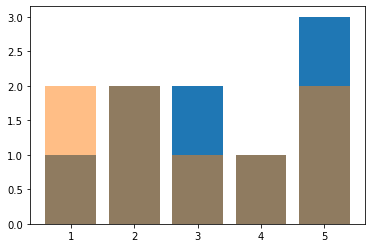

In [38]:
x = [1,2,3,4,5]
plt.bar(x,[1, 2, 2, 1, 3])
plt.bar(x,[2, 2, 1, 1, 2],alpha = 0.5)


In [107]:
np.unique([1,2,3])

array([1, 2, 3])

In [110]:
list(set([1,2,3]))

[1, 2, 3]